## Testing the tu_pystream.nedc_pystream module

In [1]:
import tu_pystream.nedc_pystream as ps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## load edf
fsamp, sig, labels = ps.nedc_load_edf('tu_pystream/example.edf')
print(fsamp)
print(len(sig))
print(len(sig[0]))
print(labels)
# plt.plot(sig[4])

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 1, 1, 1]
30
1250
['EEGFP1-REF', 'EEGFP2-REF', 'EEGF3-REF', 'EEGF4-REF', 'EEGC3-REF', 'EEGC4-REF', 'EEGP3-REF', 'EEGP4-REF', 'EEGO1-REF', 'EEGO2-REF', 'EEGF7-REF', 'EEGF8-REF', 'EEGT3-REF', 'EEGT4-REF', 'EEGT5-REF', 'EEGT6-REF', 'EEGA1-REF', 'EEGA2-REF', 'EEGFZ-REF', 'EEGCZ-REF', 'EEGPZ-REF', 'EEGROC-REF', 'EEGLOC-REF', 'EEGEKG1-REF', 'EEGT1-REF', 'EEGT2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']


In [3]:
### load parameters
params = ps.nedc_load_parameters('tu_pystream/params_04.txt')
print(params.keys())
print(params['montage'])

odict_keys(['channel_selection', 'match_mode', 'montage'])
['0,FP1-F7:EEGFP1-REF--EEGF7-REF', '1,F7-T3:EEGF7-REF--EEGT3-REF', '2,T3-T5:EEGT3-REF--EEGT5-REF', '3,T5-O1:EEGT5-REF--EEGO1-REF', '4,FP2-F8:EEGFP2-REF--EEGF8-REF', '5,F8-T4:EEGF8-REF--EEGT4-REF', '6,T4-T6:EEGT4-REF--EEGT6-REF', '7,T6-O2:EEGT6-REF--EEGO2-REF', '8,A1-T3:EEGA1-REF--EEGT3-REF', '9,T3-C3:EEGT3-REF--EEGC3-REF', '10,C3-CZ:EEGC3-REF--EEGCZ-REF', '11,CZ-C4:EEGCZ-REF--EEGC4-REF', '12,C4-T4:EEGC4-REF--EEGT4-REF', '13,T4-A2:EEGT4-REF--EEGA2-REF', '14,FP1-F3:EEGFP1-REF--EEGF3-REF', '15,F3-C3:EEGF3-REF--EEGC3-REF', '16,C3-P3:EEGC3-REF--EEGP3-REF', '17,P3-O1:EEGP3-REF--EEGO1-REF', '18,FP2-F4:EEGFP2-REF--EEGF4-REF', '19,F4-C4:EEGF4-REF--EEGC4-REF', '20,C4-P4:EEGC4-REF--EEGP4-REF', '21,P4-O2:EEGP4-REF--EEGO2-REF']


In [4]:
# select channels from parameter file
#
fsamp_sel, sig_sel, labels_sel = ps.nedc_select_channels(params, fsamp, sig, labels)
print(fsamp_sel)
print(len(sig_sel))
print(labels_sel)

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 1, 1, 1]
30
['EEGFP1-REF', 'EEGFP2-REF', 'EEGF3-REF', 'EEGF4-REF', 'EEGC3-REF', 'EEGC4-REF', 'EEGP3-REF', 'EEGP4-REF', 'EEGO1-REF', 'EEGO2-REF', 'EEGF7-REF', 'EEGF8-REF', 'EEGT3-REF', 'EEGT4-REF', 'EEGT5-REF', 'EEGT6-REF', 'EEGA1-REF', 'EEGA2-REF', 'EEGFZ-REF', 'EEGCZ-REF', 'EEGPZ-REF', 'EEGROC-REF', 'EEGLOC-REF', 'EEGEKG1-REF', 'EEGT1-REF', 'EEGT2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']


In [5]:
# apply a montage
#
fsamp_mont, sig_mont, labels_mont = ps.nedc_apply_montage(params, fsamp_sel, sig_sel, labels_sel)
print(fsamp_mont, len(sig_mont), len(sig_mont[0]), labels_mont)
print(type(sig_mont))

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250] 22 1250 ['FP1-F7', 'F7-T3', 'T3-T5', 'T5-O1', 'FP2-F8', 'F8-T4', 'T4-T6', 'T6-O2', 'A1-T3', 'T3-C3', 'C3-CZ', 'CZ-C4', 'C4-T4', 'T4-A2', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2']
<class 'list'>


# Other ways to load eeg

## load edf using highlevel


In [27]:
from pyedflib import highlevel

signals, signal_headers, header = highlevel.read_edf('tu_pystream/example.edf')
np.shape(signals), np.shape(signals[0]), np.shape(signal_headers), np.shape(header)


((30,), (1250,), (30,), ())

## MNE
https://cbrnr.github.io/2017/10/23/loading-eeg-data/


In [28]:
import mne
import os
mne.__version__

'0.20.5'

In [29]:
train_path = '../tusz_1_5_2/edf/train'
tcp_type = '01_tcp_ar'
patient_group = '023'
patient = '00002348'
session = 's008_2015_07_21'
token = '00002348_s008_t000'
token_path = os.path.join(train_path, tcp_type, patient_group, patient, session, token)
raw = mne.io.read_raw_edf(token_path+'.edf', preload=False)

Extracting EDF parameters from /Users/yanxlin/github/ids/tusz_1_5_2/edf/train/01_tcp_ar/023/00002348/s008_2015_07_21/00002348_s008_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [30]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 29 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-07-21 10:26:07 UTC
 nchan: 29
 projs: []
 sfreq: 256.0 Hz
>

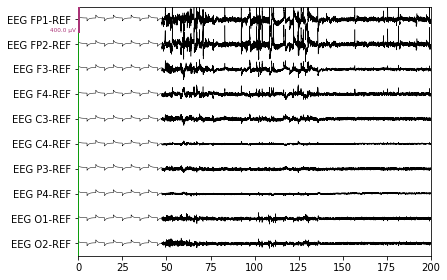

In [31]:
raw.plot(duration=200, n_channels=10, scalings=dict(eeg=20e-5), show_scrollbars=False)
plt.close()

Effective window size : 8.000 (s)


<ipython-input-32-3c2977fd7c5e>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=slice(1,20), tmin=0, tmax=256, fmin=0, fmax=128, n_fft=2048)


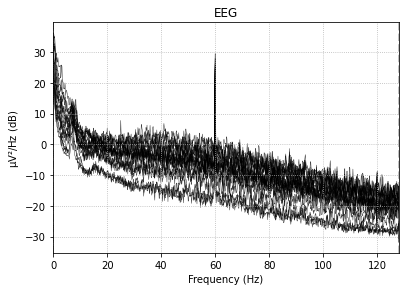

In [32]:
# power spectra density
raw.plot_psd(picks=slice(1,20), tmin=0, tmax=256, fmin=0, fmax=128, n_fft=2048)
plt.close()

Artifacts of ~60 Hz. 

# Gotcha: montage issue
For each edf file, we cannot assume the first channel is always the same physical location of electrode. 
1. Set some standard label and order.
Ideally I can use data.frame, however I will first see what format others used. The order can be arbitrary, but I will see what other used first.
2. Read edf file and its montage, 
This can be done using the aforementioned functions from pystream
3. Convert edf reading to standard format.
This can be done using numpy and panda

## Unit operations to access the raw data and label file

In [8]:
from file_io import * 
import os
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt

In [10]:
# relabeling config
LEN_PRE = 15
LEN_POS = 60
SEC_GAP = 0

In [13]:
train_path = '../tusz_1_5_2/edf/train'
tcp_type = '01_tcp_ar'
patient_group = '004'
patient = '00000492'
session = 's003_2003_07_18'
token = '00000492_s003_t001'
token_path = os.path.join(train_path, tcp_type, patient_group, patient, session, token)

# Read 1 token file
fsamp_mont, sig_mont, labels_mont = read_1_token(token_path)
np.shape(fsamp_mont), np.shape(sig_mont), np.shape(labels_mont)

((22,), (22, 73600), (22,))

In [14]:
# Sort channels if montages are different
sig_mont = sort_channel(sig_mont, labels_mont, STD_CHANNEL_01_AR)
np.shape(sig_mont)

(22, 73600)

In [15]:
# Intervals that have been annotated
# 00000492_s003_t001 0.0000 33.1425 bckg 1.0000
# 00000492_s003_t001 33.1425 53.0000 seiz 1.0000
# 00000492_s003_t001 53.0000 184.0000 bckg 1.0000
intvs, labls = load_tse_bi(token_path)
np.shape(intvs), np.shape(labls)

((3, 2), (3,))

In [16]:
# Relabel intervals by assigning pre-seizure stage
# pre-seizure stage is defined as SEC_GAP seconds preceding the seizure
intvs, labls = relabel_tse_bi(intvs=intvs, labels=labls, len_pre=LEN_PRE, len_post=LEN_POS, sec_gap=SEC_GAP)
np.shape(intvs), np.shape(labls)

((5, 2), (5,))

## Segment data into 1 second per piece

1. Chop seizure
Comparing the sampling rate, time and annotated time, we extract some chunks of seizure signal.
2. Chop pre-ictal 
Chop from 10 to 20 seconds preceding seizures.
3. Chop background
10 minutes preceding seizures and 10 minutes after seizures. 

In [19]:
# Segment data into 1 second per piece
fsamp = int(np.mean(fsamp_mont))
dataset, labels = signal_to_dataset(raw=sig_mont, fsamp=fsamp, intvs=intvs, labels=labls)
print('before:\t', np.shape(sig_mont))
print('after:\t', np.shape(dataset))
assert np.shape(dataset)[0] == np.shape(labels)[0]

before:	 (22, 73600)
after:	 (181, 22, 400)


## load one session of a patient

In [5]:
def load_1_session():
    session_path = os.path.join(train_path, tcp_type, patient_group, patient, session)

    token_files = [os.path.join(session_path, f[:-4]) for f in os.listdir(
        session_path) if f.endswith('.edf')]

    dataset, labels = [], []
    for tf in token_files:
        f, s, l = read_1_token(tf)
        # sort channel label
        s = sort_channel(s, l, STD_CHANNEL_01_AR)
        f = int(np.mean(f))
        intvs, labls = load_tse_bi(tf)
        intvs, labls = relabel_tse_bi(intvs=intvs, labels=labls, len_pre=LEN_PRE, len_post=LEN_POS, sec_gap=SEC_GAP)
        ds, lbl = signal_to_dataset(sig=s, fsamp=f, intvs=intvs, labels=labls)
        dataset.extend(ds)
        labels.extend(lbl)
        
    return dataset, labels

# dataset, labels = load_1_session()
# np.shape(dataset), np.shape(labels)

((2013, 22, 400), (2013,))

## Pre-processing, artifacts removal

#### config MNE

In [5]:
EVENT_ID = {LABEL_BKG: 0,
            LABEL_PRE: 1,
            LABEL_SEZ: 2,
            LABEL_POS: 3,
            LABEL_NAN: 4}
info = mne.create_info(ch_names=labels_mont, sfreq=np.mean(fsamp_mont), ch_types='eeg')

#### pre-processing using pyautomagic

In [6]:
import pyautomagic.preprocessing.preprocess as preproc

In [39]:
# # for i, data in enumerate(dataset):
# idata = 0
# d, l = dataset[idata], labels[idata]
# eeg = mne.io.RawArray(d, info)
# pre = preproc.Preprocess(eeg, params={
#     'line_freqs' : 50,
#     'filter_type' : 'high',
#     'filt_freq' : None,
#     'filter_length' : 'auto',
#     'eog_regression' : False,
#     'lam' : -1,
#     'tol' : 1e-7,
#     'max_iter': 1000,
#     'interpolation_params': {'line_freqs' : 50,
#                            'ref_chs': eeg.ch_names,
#                            'reref_chs': eeg.ch_names,
#                            'montage': 'standard_1020'}})
# new = pre.perform_prep()
# pre.eeg.plot(scalings=dict(eeg=20))

This does not work, because TUH_EEG data is bipolar montage, while the pyautomagic, pyprep and mne do not support such montage.

### independent component analysis (ICA)

## Power spectra features

In [44]:
# ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)

# idata = 0
# d, l = dataset[idata], labels[idata]
# eeg = mne.io.RawArray(d, info)

# ica = ica.fit(eeg)
# # eeg.plot()
# eeg.plot(scalings = {'eeg':20})
# # plt.close()

#### mne Epochs

In [9]:
epochs = mne.EpochsArray(dataset, info = info, 
                         events=np.array([[i, 0, EVENT_ID.get(labels[i])] for i in range(0, len(labels))]),
                         event_id=EVENT_ID, on_missing='ignore')
epochs

2013 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


<EpochsArray  |   2013 events (all good), 0 - 0.9975 sec, baseline off, ~135.2 MB, data loaded,
 '': 0
 'bckg': 867
 'post': 702
 'pres': 123
 'seiz': 321>

In [10]:
psds, freqs = mne.time_frequency.psd_multitaper(epochs)
np.shape(psds),np.shape(freqs)

    Using multitaper spectrum estimation with 7 DPSS windows


((2013, 22, 201), (201,))

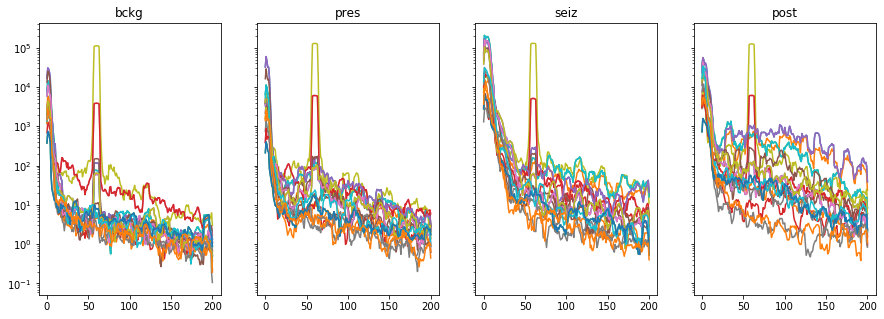

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharex=True, sharey=True)

# ishows = [4, 17, 18, 40, 80, 160]

for i, ax in enumerate(axes.flat):
    [ax.plot(freqs, channel) for channel in psds[ishows[i]]]
    ax.set_yscale('log')
    ax.set_title(labels[ishows[i]])
#     ax.imshow(psds[ishows[i]], extent=[0,30, 0,22], cmap='jet')
#     pd.DataFrame({'f':freqs, 'psd':psds[ishows[i]]}

## Which channels are more differentiating?

It seems the low-freq energy is differentiating? 

In [12]:
np.shape(psds), np.shape(freqs), np.shape(dataset), np.shape(labels)

((2013, 22, 201), (201,), (2013, 22, 400), (2013,))

In [51]:
import feature as ft
import seaborn as sb


def explore1D(new_ds, title=''):
    sb.stripplot(x='x', y='y', data=pd.DataFrame().assign(x=new_ds, y=labels))
    plt.title(title)
    
    
def explore2D(ds, labels, title=''):
    """
    ds: nepochs x nchannels x nsamples
    """
    _, axes = plt.subplots(nrows=22, ncols=4, figsize=(15, 50))
    arranges = (LABEL_BKG, LABEL_PRE, LABEL_SEZ, LABEL_POS, LABEL_NAN)
    for i, epoch in enumerate(ds):
        icol = arranges.index(labels[i])
        for ic, channel in enumerate(epoch):
            axes[ic][icol].plot(channel, c='k')

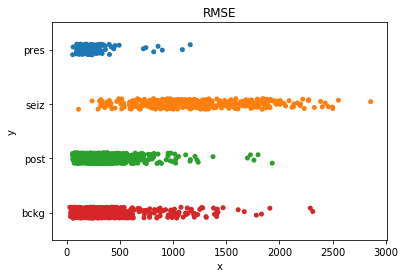

In [16]:
    
#     for i, ax in enumerate(axes.flat):
#         [ax.plot(freqs, channel) for channel in psds[ishows[i]]]
#         ax.set_yscale('log')
#         ax.set_title(labels[ishows[i]])
    
#     sns.set(style="ticks")

#     dots = sns.load_dataset("dots")

#     # Define a palette to ensure that colors will be
#     # shared across the facets
#     palette = dict(zip(dots.coherence.unique(),
#                        sns.color_palette("rocket_r", 6)))

#     # Plot the lines on two facets
#     sns.relplot(x="time", y="firing_rate",
#                 hue="coherence", size="choice", col="align",
#                 size_order=["T1", "T2"], palette=palette,
#                 height=5, aspect=.75, facet_kws=dict(sharex=False),
#                 kind="line", legend="full", data=dots)

# _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3), sharey=True)

# RMSE
new_ds = [np.mean(ft.RMSE(sample)) for sample in dataset]
explore1D(new_ds, 'RMSE')

# plt.sca(axes[0])

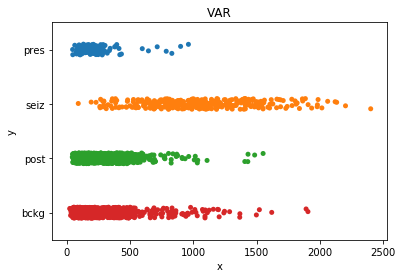

In [68]:
# VAR
new_ds = [np.mean(np.var(np.array(sample), 0)) for sample in dataset]
explore1D(new_ds, 'VAR')

### line length

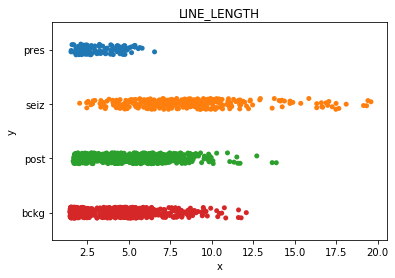

In [14]:
# Line length
f1 = [np.mean(ft.line_length(sample)) for sample in dataset]
explore1D(f1, 'LINE_LENGTH')

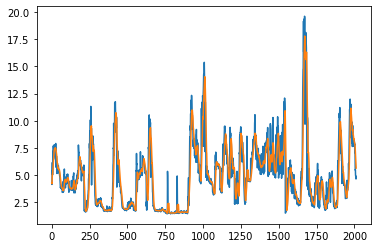

In [16]:
def window_avg(line_lengths, window_size=5):
    """Window average of line lengths.

    Args:
        line_lengths(list): array of line lengths
        window_size:

    Returns:
        same length as line_lengths, taped with mean

    """
    return [np.mean(line_lengths[max(0, i-window_size+1):i+1]) for i in range(0,
        len(line_lengths))]

f2 = window_avg(f1, 10)

plt.plot(f1)
plt.plot(f2)
# explore1D(f2, 'F2')


In [ ]:
f3 = ft.line_length(f2)

line lenth seems promising, but the bckg has too large variance

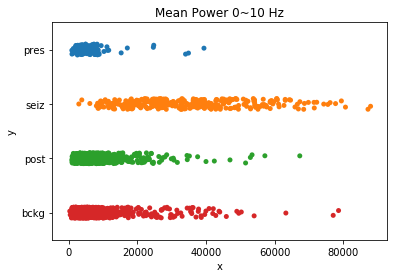

In [74]:
# psd 0~45 Hz
new_ds = np.mean(np.array(psds)[:,:, 0:10], axis=(1,2))
explore1D(new_ds, 'Mean Power 0~10 Hz')

### PyEEG 

In [54]:
import pyeeg
locate = lambda listOfElems, elem: [ i for i in range(len(listOfElems)) if listOfElems[i] == elem ]

plt.plot()

In [23]:
dataset_power = []
for i, data in enumerate(dataset):
    res = []
    for j, channel in enumerate(data):
        power = pyeeg.bin_power(channel, Band=range(0, 45), Fs=fsamp)[0]
        res.append(power)
    dataset_power.append(res)
np.shape(dataset_power)   

(2013, 22, 44)

In [1]:
ds_pwd = np.array(dataset_power)
ds_bkg, ds_pre, ds_sez, ds_pos = [], [], [], []
ds_bkg = ds_pwd[locate(labels, LABEL_BKG),:,:]
ds_pre = ds_pwd[locate(labels, LABEL_PRE),:,:]

NameError: name 'np' is not defined

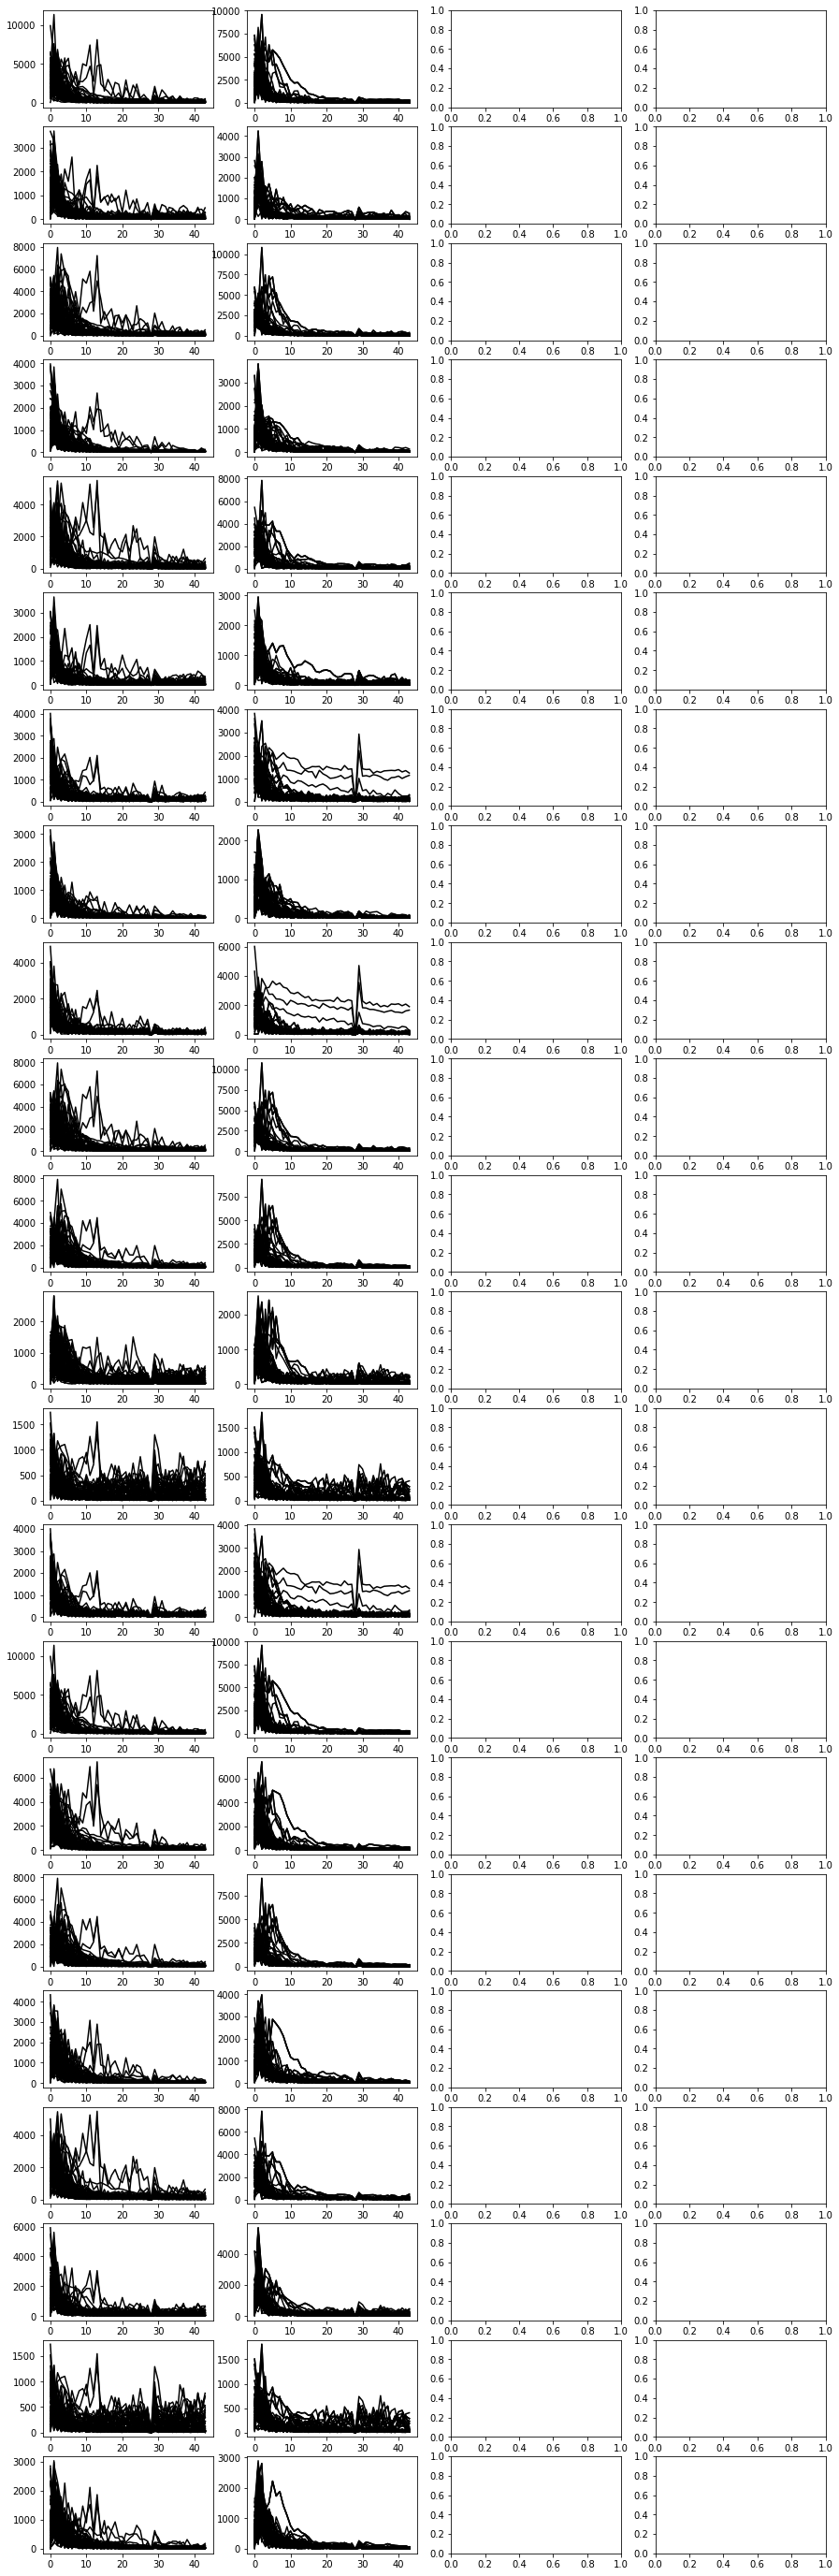

In [74]:
np.random.seed(0)
rnd_indices = np.random.choice(np.shape(ds_bkg)[0], size=100)
rnd_indices2 = np.random.choice(np.shape(ds_pre)[0], size=100)

explore2D(np.concatenate((ds_bkg[rnd_indices], ds_pre[rnd_indices2])), labels=[LABEL_BKG]*100+[LABEL_PRE]*100)

Looks like we can use the powers of 22 channels to differentiate PRE vs BKG. 
We can compute the AUC to represent the average power. Or, compute the average frequency.

In [133]:
#wrangling to dataframe

ne, nc, ns = np.shape(ds_pwd)

df_pwd = pd.DataFrame(ds_pwd.transpose([0,2,1]).reshape(-1, np.shape(ds_pwd)[1]),
                     columns=['ch'+ str(i) for i in np.arange(0, nc)])

df_pwd = df_pwd.assign(freq=np.tile(np.arange(0, np.shape(ds_pwd)[2]), np.shape(ds_pwd)[0]))\
    .assign(labels = np.repeat(labels, ns))\
    .assign(epoch = np.repeat(np.arange(0, ne), ns))

df_pwd.tail()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch15,ch16,ch17,ch18,ch19,ch20,ch21,freq,labels,epoch
88567,214.440123,125.883290,175.349445,15.372205,109.175661,205.382894,108.721999,22.086772,71.111972,175.349445,...,57.149420,21.700642,41.497151,109.175661,102.721203,37.836804,57.431635,39,post,2012
88568,438.853494,367.680734,273.624317,9.161372,110.075066,167.151668,54.067523,24.896487,168.018209,273.624317,...,110.216756,47.824699,66.133381,110.075066,298.121557,31.714240,70.902752,40,post,2012
88569,317.872513,282.091258,135.709215,29.384350,231.285558,127.879420,222.663593,33.124313,72.052119,135.709215,...,92.706102,60.695819,3.395686,231.285558,65.432775,161.821229,50.738249,41,post,2012
88570,174.193325,135.733080,180.537980,15.332499,213.185756,148.370065,197.854742,25.452137,120.913044,180.537980,...,56.566075,47.851915,36.701423,213.185756,199.749814,75.452453,22.198453,42,post,2012
88571,19.231124,43.329401,47.666062,21.997170,57.840527,144.328054,151.848062,7.009163,120.728119,47.666062,...,18.145547,20.968695,39.221749,57.840527,163.638709,106.801699,56.566752,43,post,2012


### compute the power of each channel.


In [200]:
dfpwd = pd.wide_to_long(df_pwd, ['ch'], ['freq', 'labels', 'epoch'], 'channel')

TypeError: wide_to_long() got an unexpected keyword argument 'as_index'

In [195]:
np.random.seed(0)
df = pd.DataFrame(np.random.rand(4,4), columns=list('abcd'))
df['group'] = [0, 0, 1, 1]
# df
df.groupby(['group', 'd']).apply(lambda x: pd.DataFrame({'d':x.a + x.b}))

,d
0,1.264003
1,1.069549
2,1.347104
3,1.493641


In [199]:
df_pwd.describe()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch14,ch15,ch16,ch17,ch18,ch19,ch20,ch21,freq,epoch
count,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,...,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000,88572.000000
mean,643.875858,267.928721,603.190589,215.470945,479.188534,223.346807,281.815259,157.852233,311.847292,603.190589,...,643.875858,547.376274,523.949273,290.898027,479.188534,355.714790,181.762339,221.970429,21.500000,1006.000000
std,1188.044502,429.459494,1139.191875,396.053034,833.655665,378.922368,431.516621,278.821884,438.491708,1139.191875,...,1188.044502,1053.416040,1017.514529,546.681545,833.655665,616.675575,235.778736,387.904800,12.698497,581.106255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.109627,47.773098,79.534437,33.689584,67.287710,41.772184,79.829498,29.921182,92.120720,79.534437,...,89.109627,69.890715,66.354008,40.020274,67.287710,56.976402,36.045286,37.195474,10.750000,503.000000
50%,207.096188,111.453527,182.649661,70.162945,158.361863,88.990620,138.482296,57.663821,162.478919,182.649661,...,207.096188,153.290644,148.030467,85.537109,158.361863,132.003129,80.619710,76.159801,21.500000,1006.000000
75%,529.875074,276.323276,525.954089,198.643017,442.413936,211.292542,255.152982,140.886306,311.629553,525.954089,...,529.875074,419.426134,430.114328,240.438003,442.413936,348.154430,241.873180,196.441556,32.250000,1509.000000
max,11773.581986,4746.491770,14842.805450,6590.238379,8922.640315,4437.751160,7386.699593,4002.136139,6512.316259,14842.805450,...,11773.581986,11436.960444,12875.156957,7715.981656,8922.640315,8803.453116,4131.792386,6106.229593,43.000000,2012.000000


In [179]:
tmp = dfpwd.groupby(['epoch', 'channel'])

tmp.agg({'epoch': 'mean'})


SpecificationError: nested renamer is not supported

In [79]:
avg_power = np.sum(ds_pwd, 2)
avg_freq = np.sum((ds_pwd / avg_power[:,:,np.newaxis]) * np.arange(0, np.shape(ds_pwd)[2]), 2)
np.shape(avg_power), np.shape(avg_freq)

((2013, 22), (2013, 22))

In [114]:
np.arange(0,2*3*4).reshape(2,3,4).reshape(-1, 4)
np.arange(0,2*3*4).reshape(2,3,4).transpose([0,2,1]).reshape(-1, 3)
np.tile(np.arange(0, 24).reshape(2,3,4),[2, 2])

array([[[ 0,  1,  2,  3,  0,  1,  2,  3],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 8,  9, 10, 11,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  0,  1,  2,  3],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 8,  9, 10, 11,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 12, 13, 14, 15],
        [16, 17, 18, 19, 16, 17, 18, 19],
        [20, 21, 22, 23, 20, 21, 22, 23],
        [12, 13, 14, 15, 12, 13, 14, 15],
        [16, 17, 18, 19, 16, 17, 18, 19],
        [20, 21, 22, 23, 20, 21, 22, 23]]])

### simple classifier

In [81]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

clf = svm.SVC(gamma=0.001, C=100.)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split()

Artifacts of ~60 Hz. 

Effective window size : 8.000 (s)


<ipython-input-32-3c2977fd7c5e>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(picks=slice(1,20), tmin=0, tmax=256, fmin=0, fmax=128, n_fft=2048)


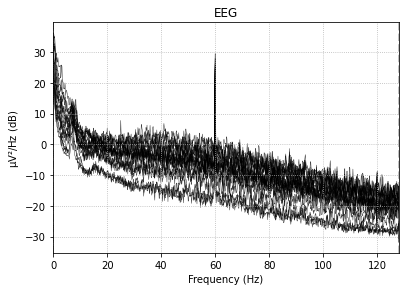

In [32]:
# power spectra density
raw.plot_psd(picks=slice(1,20), tmin=0, tmax=256, fmin=0, fmax=128, n_fft=2048)
plt.close()

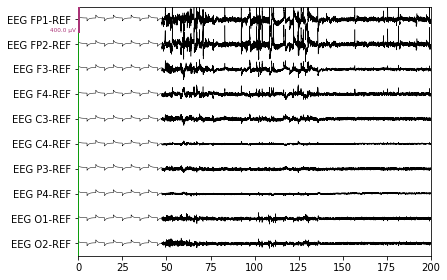

In [31]:
raw.plot(duration=200, n_channels=10, scalings=dict(eeg=20e-5), show_scrollbars=False)
plt.close()

## Try MNE
https://cbrnr.github.io/2017/10/23/loading-eeg-data/


In [28]:
import mne
import os
mne.__version__

'0.20.5'

In [29]:
train_path = '../tusz_1_5_2/edf/train'
tcp_type = '01_tcp_ar'
patient_group = '023'
patient = '00002348'
session = 's008_2015_07_21'
token = '00002348_s008_t000'
token_path = os.path.join(train_path, tcp_type, patient_group, patient, session, token)
raw = mne.io.read_raw_edf(token_path+'.edf', preload=False)

Extracting EDF parameters from /Users/yanxlin/github/ids/tusz_1_5_2/edf/train/01_tcp_ar/023/00002348/s008_2015_07_21/00002348_s008_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [30]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, EEG C3-REF, ...
 chs: 29 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2015-07-21 10:26:07 UTC
 nchan: 29
 projs: []
 sfreq: 256.0 Hz
>